In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("../data/shirtsize.csv")
data

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [3]:
euc_dist = lambda p1, p2: np.sum((p1-p2)**2)**0.5

In [4]:
def knn_find_class(height, weight, k=5):
    p1 = np.array([height, weight])
    matches = []
    for index, row in data.iterrows():
        ref_row = row[["Height", "Weight"]].values
        matches.append((index, euc_dist(p1, ref_row), row["Size"]))
    
    classes = {}
    n = 0
    for match in sorted(matches, key=lambda m: m[1]):
        n += 1
        if n > k:
            break
        if match[2] not in classes:
            classes[match[2]] = 1
        else:
            classes[match[2]] += 1

    res = None
    temp = 0
    for c in classes:
        if temp < classes[c]:
            res = c
            temp = classes[c]
    strength = temp / k
    return res, strength

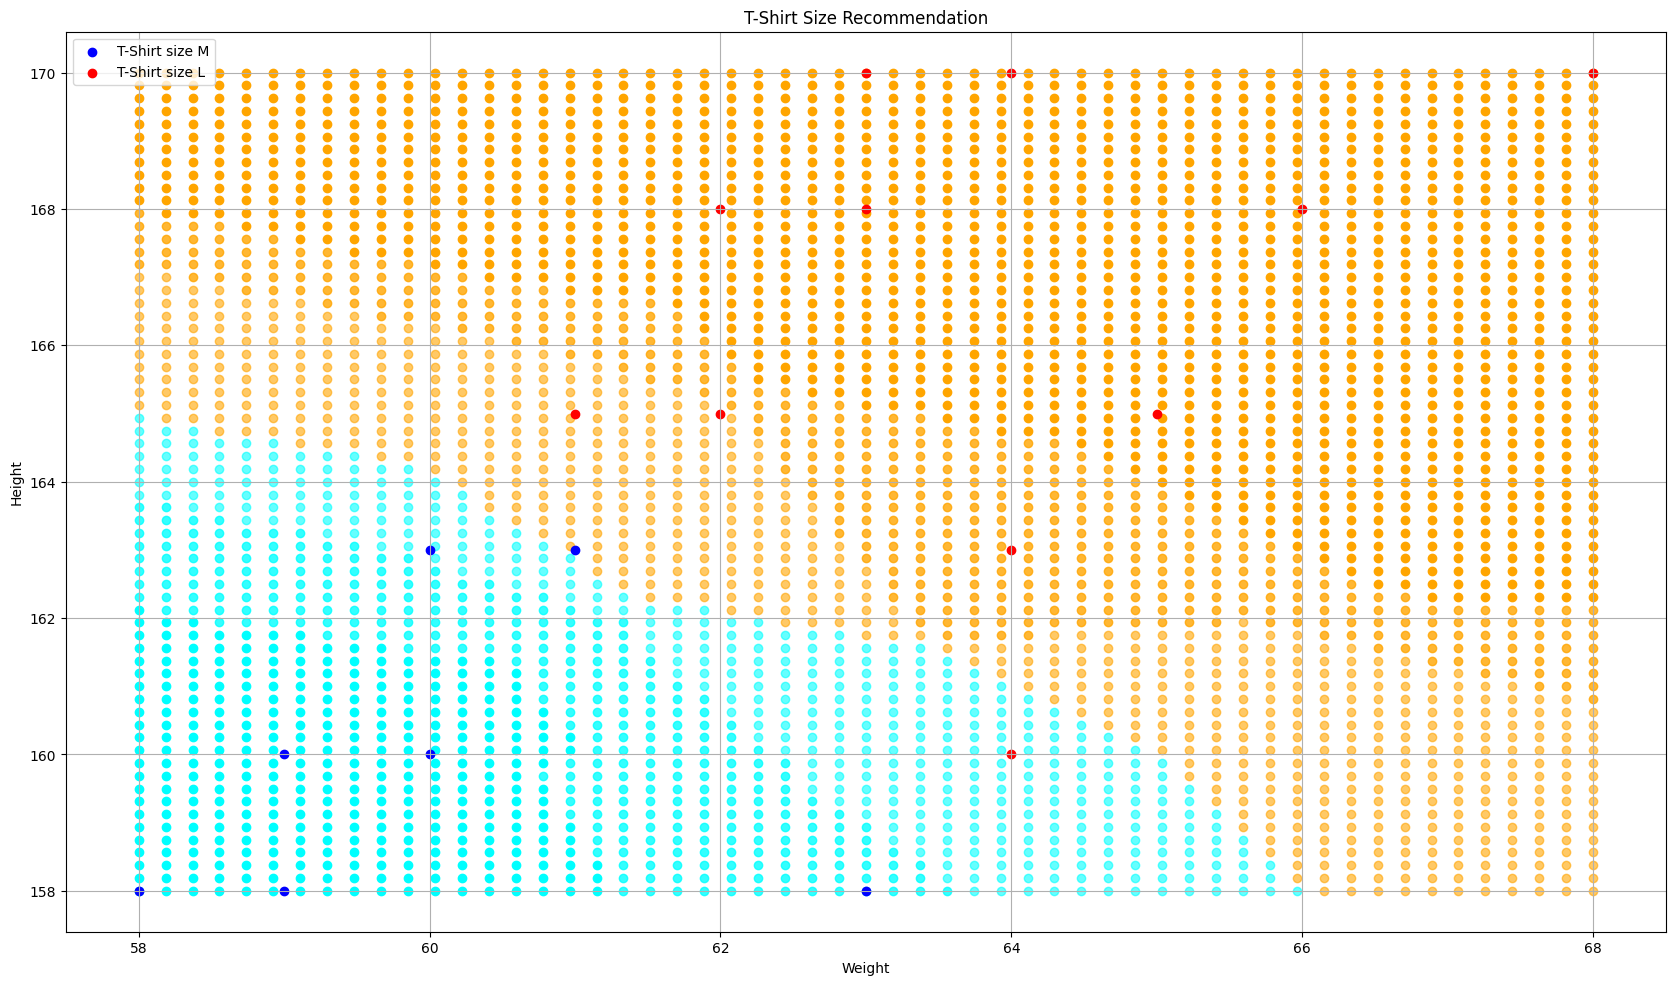

In [5]:
hs = np.linspace(158, 170, 65)
ws = np.linspace(58, 68, 55)
hws = np.array(np.meshgrid(hs, ws)).T.reshape(-1, 2)

fig = plt.figure(figsize=(16, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel("Weight")
ax.set_ylabel("Height")
ax.set_title("T-Shirt Size Recommendation")
for h, w in hws:
    pred = knn_find_class(h, w)
    ax.scatter(w, h, c="cyan" if pred[0] == "M" else "orange", alpha=pred[1])
ax.scatter(data[data["Size"] == "M"]["Weight"], data[data["Size"] == "M"]["Height"], label="T-Shirt size M", c="blue")
ax.scatter(data[data["Size"] == "L"]["Weight"], data[data["Size"] == "L"]["Height"], label="T-Shirt size L", c="red")
ax.legend()
ax.grid()